In [1]:
#Name:- Ranika Kailash Joshi
#section:- 3A
#Roll No.:- 59

# Outlier Detection and Removal Using IQR

In [2]:
import pandas as pd



In [3]:
import os

In [7]:
os.getcwd()

'C:\\Users\\nandi'

In [8]:
os.chdir("C:\\Users\\nandi\\OneDrive\\Desktop")

In [9]:
data=pd.read_csv("height.csv")

In [10]:
data.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


# <h3 style='color:purple'>Detect outliers using IQR<h3>

In [11]:
Q1 = data.Height.quantile(0.25)
Q3 = data.Height.quantile(0.75)
Q1, Q3

(63.505620480000005, 69.17426172750001)

In [12]:
IQR = Q3 - Q1
IQR

5.668641247500005

In [13]:
lowwer_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5*IQR
lowwer_limit, upper_limit

(55.00265860875, 77.67722359875002)

# Here are the outliers

In [14]:
data[(data.Height<lowwer_limit)| (data.Height>upper_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
7294,Female,54.873728
9285,Female,54.263133


# <h3 style= 'color:purple'> Remove outliers<h3>

In [15]:
data_no_outlier = data[(data.Height>lowwer_limit) & (data.Height<upper_limit)]


In [16]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [17]:
data= pd.read_csv("height.csv")
data.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [18]:
data.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

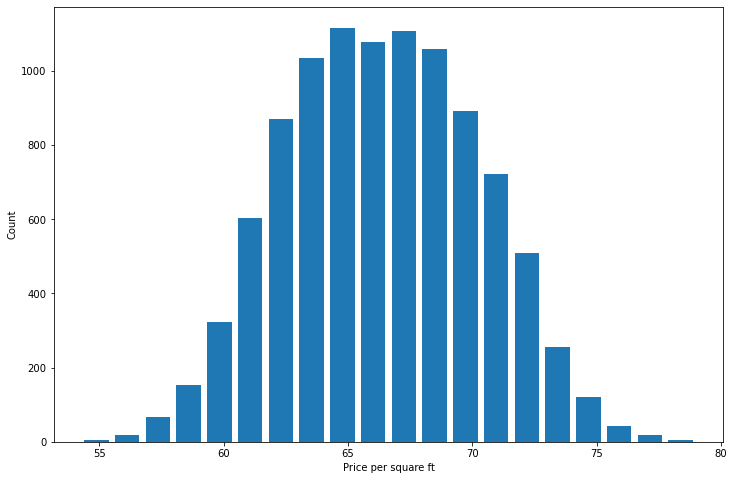

In [19]:
plt.hist(data.Height, bins= 20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

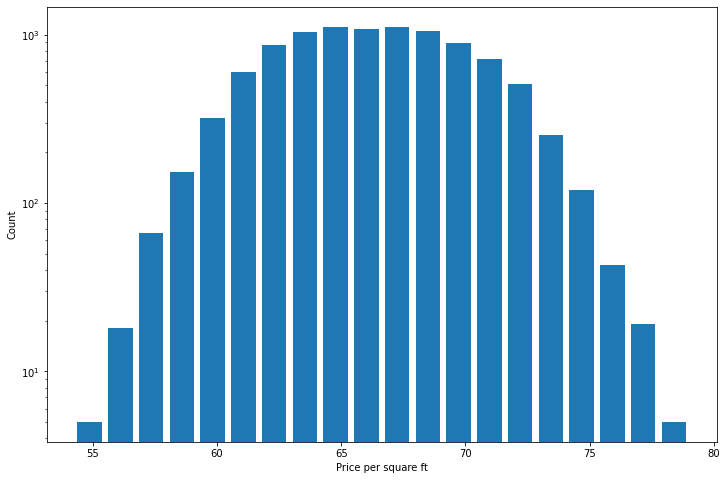

In [20]:
plt.hist(data.Height, bins =20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

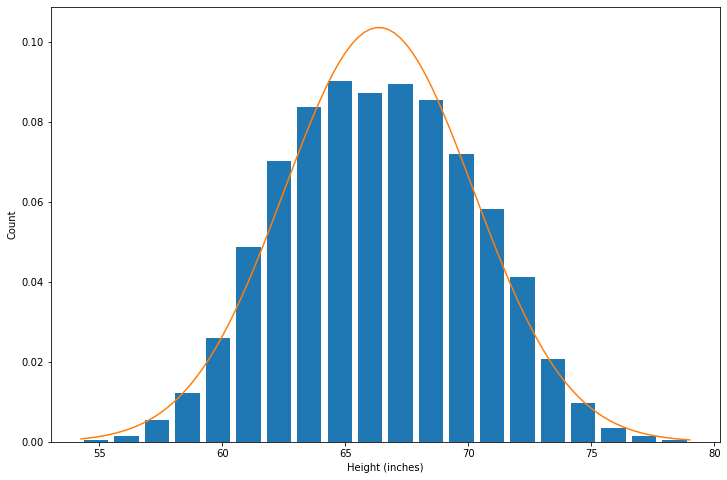

In [21]:
from scipy.stats import norm
import numpy as np

plt.hist(data.Height, bins = 20, rwidth= 0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.linspace(54.263133, data.Height.max(), 100)
plt.plot(rng, norm.pdf(rng, data.Height.mean(), data.Height.std()))

# Treat outliers using percentile first

In [22]:
lowwer_limit, upper_limit = data.Height.quantile([0.001, 0.999])
lowwer_limit, upper_limit

(56.066548911530006, 77.06738853708)

In [23]:
outliers = data[(data.Height> upper_limit) |(data.Height< lowwer_limit)]
outliers.sample(10)

,Gender,Height
7617,Female,55.148557
6624,Female,54.616858
8692,Female,55.651892
5360,Female,55.668202
5345,Female,55.336492
2014,Male,78.998742
1317,Male,78.462053
3285,Male,78.528210
3757,Male,78.621374
9825,Female,55.979198


In [24]:
df= data[(data.Height< upper_limit) & (data.Height > lowwer_limit)]
df.shape

(9980, 2)

In [25]:
data.shape

(10000, 2)

In [26]:
data.shape[0] - df.shape[0]

20

# Remove ouliers using 4 standard deviation

In [27]:
max_limit = data.Height.mean() + 4*data.Height.std()
min_limit = data.Height.mean() - 4*data.Height.std()
max_limit, min_limit

(81.75767223804789, 50.9774472716833)

In [28]:
max_limit = df.Height.mean() + 3 * df.Height.std()
min_limit = df.Height.mean() - 3 * df.Height.std()


In [29]:
data[(data.Height>max_limit) | (data.Height<min_limit)].sample(5)

,Gender,Height
1317,Male,78.462053
2014,Male,78.998742
9285,Female,54.263133
3285,Male,78.528210
6624,Female,54.616858


In [30]:
data = data[(data.Height>min_limit) & (data.Height<max_limit)]
data.shape

(9992, 2)

In [31]:
data.shape[0]-data.shape[0]

0

# Remove outliers using z score. Use z score of 4 as your thresold

In [32]:
data['zscore'] = (data.Height-data.Height.mean())/data.Height.std()
data.sample(10)

,Gender,Height,zscore
7881,Female,63.020348,-0.872372
256,Male,71.057511,1.223925
9578,Female,69.416718,0.795965
8213,Female,64.502245,-0.485856
1174,Male,67.277198,0.237923
9141,Female,66.000753,-0.095007
6547,Female,61.819663,-1.185542
4619,Male,66.327699,-0.009731
3081,Male,69.431259,0.799757
7819,Female,63.420513,-0.767999


In [33]:
outliers_z = data[(data.zscore < -4) | (data.zscore>4)]
outliers_z.shape

(0, 3)

In [34]:
outliers_z.sample(0)

,Gender,Height,zscore
